In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:

df=pd.read_csv('price_data.csv')
df

,date,avg_monthly_price
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876
...,...,...
244,2025-05-01,14263
245,2025-06-01,14263
246,2025-07-01,16000
247,2025-08-01,15025


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               249 non-null    object
 1   avg_monthly_price  249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [4]:
df.describe()

,avg_monthly_price
count,249.000000
mean,7918.891566
std,2804.992684
min,3500.000000
25%,6123.000000
50%,7250.000000
75%,9783.000000
max,16163.000000


In [5]:
# Convert 'Datetime' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               249 non-null    datetime64[ns]
 1   avg_monthly_price  249 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.0 KB


In [7]:
df.isnull().sum()

date                 0
avg_monthly_price    0
dtype: int64

In [8]:
# Normalize the target variable
scaler = MinMaxScaler()
df['avg_monthly_price'] = scaler.fit_transform(df[['avg_monthly_price']])

In [9]:
sequence_length = 4  # Using past 4 months to predict next month

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])     # 4 past values
        y.append(data[i + seq_length])       # the next value
    return np.array(X), np.array(y)

In [10]:
# Prepare the dataset
data = df['avg_monthly_price'].values
X, y = create_sequences(data, sequence_length)

In [11]:
print(X.shape)
print(y.shape)


(245, 4)
(245,)


In [12]:
X

array([[0.15794046, 0.15604517, 0.15525547, 0.15691384],
       [0.15604517, 0.15525547, 0.15691384, 0.18763326],
       [0.15525547, 0.15691384, 0.18763326, 0.12303562],
       [0.15691384, 0.18763326, 0.12303562, 0.11205875],
       [0.18763326, 0.12303562, 0.11205875, 0.13022191],
       [0.12303562, 0.11205875, 0.13022191, 0.11047935],
       [0.11205875, 0.13022191, 0.11047935, 0.08386638],
       [0.13022191, 0.11047935, 0.08386638, 0.09200032],
       [0.11047935, 0.08386638, 0.09200032, 0.02471768],
       [0.08386638, 0.09200032, 0.02471768, 0.03948511],
       [0.09200032, 0.02471768, 0.03948511, 0.09910764],
       [0.02471768, 0.03948511, 0.09910764, 0.05338387],
       [0.03948511, 0.09910764, 0.05338387, 0.        ],
       [0.09910764, 0.05338387, 0.        , 0.19742557],
       [0.05338387, 0.        , 0.19742557, 0.11561241],
       [0.        , 0.19742557, 0.11561241, 0.0893943 ],
       [0.19742557, 0.11561241, 0.0893943 , 0.09444839],
       [0.11561241, 0.0893943 ,

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(196, 4)
(196,)
(49, 4)
(49,)


In [14]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(196, 4, 1)
(49, 4, 1)


In [15]:
# Define LSTM model

lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

c:\Users\Pc\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Train LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0051 - loss: 0.1219 - val_accuracy: 0.0000e+00 - val_loss: 0.3417
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0051 - loss: 0.1078 - val_accuracy: 0.0000e+00 - val_loss: 0.3151
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0051 - loss: 0.0927 - val_accuracy: 0.0000e+00 - val_loss: 0.2811
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0051 - loss: 0.0731 - val_accuracy: 0.0000e+00 - val_loss: 0.2314
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0051 - loss: 0.0497 - val_accuracy: 0.0000e+00 - val_loss: 0.1697
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0051 - loss: 0.0278 - val_accuracy: 0.0000e+00 - val_loss: 0.1057
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0051 - loss: 0.0173 - val_accuracy: 0.0000e+00 - val_loss: 0.0635
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0051 - loss: 0.0168 - val_accuracy: 0

In [17]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
print("Predicted price for Next month LSTM:", lstm_predictions[0][0], "USD")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Predicted price for Next month LSTM: 6850.138 USD


In [18]:
single_sequence_scaled = X_test[-1]

single_sequence_scaled = single_sequence_scaled.reshape((1, sequence_length, 1))

# Make a prediction using the LSTM model
predicted_value_scaled = lstm_model.predict(single_sequence_scaled)

# Inverse transform the prediction to get the value in the original scale
predicted_value_original = scaler.inverse_transform(predicted_value_scaled)

print("Predicted value for the next Month price (scaled):", predicted_value_scaled[0][0])
print("Predicted value for the next Month price (original scale):", predicted_value_original[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted value for the next Month price (scaled): 0.8993983
Predicted value for the next Month price (original scale): 14889.081


In [19]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

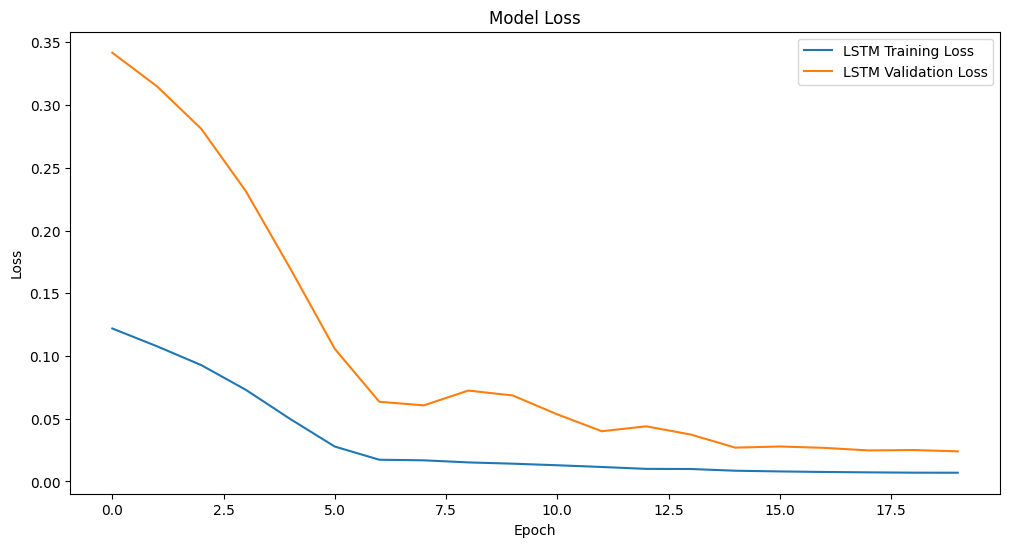

In [20]:
# Visualize the training history (loss)
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


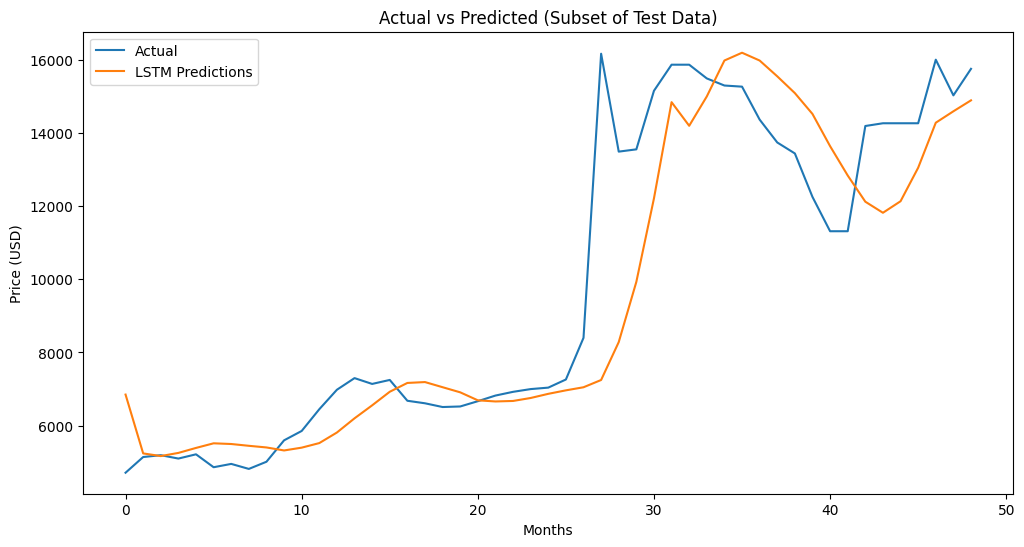

In [21]:
# Visualize the actual vs predicted values for a subset of the test data
plt.figure(figsize=(12, 6))
plt.plot(y_test_original[:100], label='Actual')
plt.plot(lstm_predictions[:100], label='LSTM Predictions')
plt.title('Actual vs Predicted (Subset of Test Data)')
plt.ylabel('Price (USD)')
plt.xlabel('Months')
plt.legend()
plt.show()

In [22]:
import joblib 
#Assuming lstm_model and scaler are defined

lstm_model.save('lstm_model.keras')
joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']

In [23]:
# pip show tensorflow